<a href="https://colab.research.google.com/github/AlexLoser57/Nguyen-Thanh-Hon---20104033/blob/main/week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as cl
import matplotlib.pyplot as plt

gio = float(input('Nhập tốc độ gió: '))
nhiet = float(input('Nhập nhiệt độ: '))


W = cl.Antecedent(np.arange(0.7, 3.2, 0.1), 'wind')
T = cl.Antecedent(np.arange(20.4, 41.3, 0.1), 'tem')
R = cl.Consequent(np.arange(0.2, 9.2, 0.1), 'rain')

T['vl'] = fuzz.trimf(T.universe, [20.4, 20.4, 23])
T['l'] = fuzz.trimf(T.universe, [22, 26, 28])
T['n'] = fuzz.trimf(T.universe, [26, 28, 30])
T['h'] = fuzz.trimf(T.universe, [28, 30, 34])
T['vh'] = fuzz.trimf(T.universe, [32, 34, 41.2])

W['vl'] = fuzz.trimf(W.universe, [0.7, 0.7, 1])
W['l'] = fuzz.trimf(W.universe, [0.8, 1, 2])
W['n'] = fuzz.trimf(W.universe, [1, 2, 2.5])
W['h'] = fuzz.trimf(W.universe, [2, 2.5, 3])
W['vh'] = fuzz.trimf(W.universe, [2.5, 3, 3.1])

R['vl'] = fuzz.trimf(R.universe, [0.2, 0.2, 2])
R['l'] = fuzz.trimf(R.universe, [1, 2, 3.5])
R['n'] = fuzz.trimf(R.universe, [2, 3.5, 7])
R['h'] = fuzz.trimf(R.universe, [3.5, 7, 8])
R['vh'] = fuzz.trimf(R.universe, [7, 8, 9.1])

names_tem = ['vl','l','n','h','vh']
names_wind = ['vl','l','n','h','vh']
names_rain = ['vl','l','n','h','vh']


T.automf(names=names_tem)
W.automf(names=names_wind)
R.automf(names=names_rain)

rule1 = cl.Rule(T['vl'] & W['vl'], R['vl'])
rule2 = cl.Rule(T['vl'] & W['l'], R['vl'])
rule3 = cl.Rule(T['vl'] & W['n'], R['l'])
rule4 = cl.Rule(T['vl'] & W['h'], R['n'])
rule5 = cl.Rule(T['vl'] & W['vh'], R['h'])

rule6 = cl.Rule(T['l'] & W['vl'], R['vl'])
rule7 = cl.Rule(T['l'] & W['l'], R['vl'])
rule8 = cl.Rule(T['l'] & W['n'], R['l'])
rule9 = cl.Rule(T['l'] & W['h'], R['n'])
rule10 = cl.Rule(T['l'] & W['vh'], R['h'])

rule11 = cl.Rule(T['n'] & W['vl'], R['l'])
rule12 = cl.Rule(T['n'] & W['l'], R['l'])
rule13 = cl.Rule(T['n'] & W['n'], R['l'])
rule14 = cl.Rule(T['n'] & W['h'], R['h'])
rule15 = cl.Rule(T['n'] & W['vh'], R['vh'])

rule16 = cl.Rule(T['h'] & W['vl'], R['n'])
rule17 = cl.Rule(T['h'] & W['l'], R['n'])
rule18 = cl.Rule(T['h'] & W['n'], R['n'])
rule19 = cl.Rule(T['h'] & W['h'], R['h'])
rule20 = cl.Rule(T['h'] & W['vh'], R['vh'])

rule21 = cl.Rule(T['vh'] & W['vl'], R['h'])
rule22 = cl.Rule(T['vh'] & W['l'], R['h'])
rule23 = cl.Rule(T['vh'] & W['n'], R['h'])
rule24 = cl.Rule(T['vh'] & W['h'], R['vh'])
rule25 = cl.Rule(T['vh'] & W['vh'], R['vh'])

system_cl = cl.ControlSystem(rules=[rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11,
                             rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
system = cl.ControlSystemSimulation(system_cl)
system.input['wind'] = gio
system.input['tem'] = nhiet
system.compute()
print('Lượng mưa: ' + "{:.2f}".format(system.output['rain'])+'mm')
R.view(sim=system)

R.view()


In [ ]:
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as cl
import matplotlib.pyplot as plt

h = float(input('Height ? (meter) : '))
w = float(input('Weight ? (kg ): '))
s = input('Sex ? : ')
a = int(input('Age ? : '))
ibw = float(input('Ideal Body Weight ? (kg) : '))
atv = input('Activity level ? (Vl, L ,M, H)')

BMI = cl.Antecedent(np.arange(17, 27, 0.1), 'bmi')
bmi = w/(h**2)
bmr = ibw * 24

if s == 'Male':
  if 

AttributeError: ignored

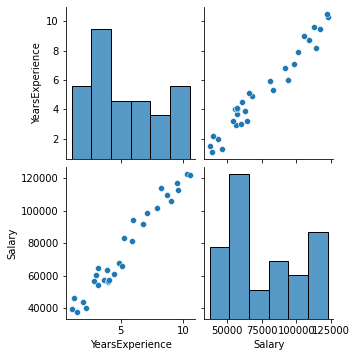

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv('Salary_Data.csv')
X = data.drop(['Salary'], axis = True)
Y = data['Salary']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
X_train.shape, X_test.shape,Y_train.shape, Y_test.shape

data.head(30)
sea.pairplot(data)

plt.plot(X_train, Y_train, 'r.',lable = 'Train Data' )
plt.xlable('Year Experience')
plt.ylable('Salary')
plt.legend()
plt.show()

model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test).round(1)

cal = pd.DataFrame(np.c_[Y_test,Y_pred],columns=['Original Salary','Predicted Salary'])

print('Coeffient',model.coef_)
print('Intercept',model.intercept_)
print('Accuracy',model.score(X_train,Y_train))



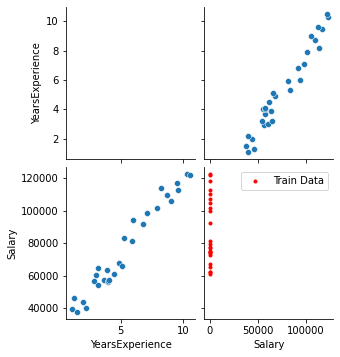

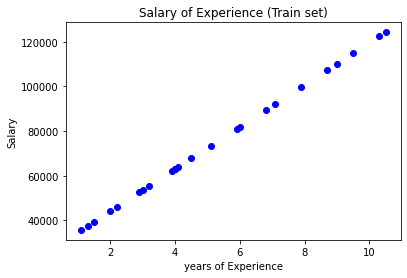

Coeffient [9423.81532303]
Intercept 25321.583011776813
Accuracy 0.9645401573418146


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('Salary_Data.csv')
data.head()
#data.shape()

x = data.drop(['Salary'],axis=True) #xoa cot salary
y = data['Salary']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape
sns.pairplot(data)

plt.plot(x_train,y_train,'r.',label='Train Data')
plt.xlabel('year experience')
plt.xlabel('Salary')
plt.legend()
plt.show()

plt.scatter(x_train,model.predict(x_train),color='blue')
plt.title('Salary of Experience (Train set)')
plt.xlabel('years of Experience')
plt.ylabel('Salary')
plt.show()

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test).round(1)
cal = pd.DataFrame(np.c_[y_test,y_pred],columns=['Original Salary','Predicted Salary'])

print('Coeffient',model.coef_)
print('Intercept',model.intercept_)
print('Accuracy',model.score(x_train,y_train))